In [5]:
from tensorflow.keras.datasets import mnist
import tensorflow.keras.utils as utils # One-Hot Encoding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [17]:
# Dataset
width = 28; height = 28
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 독립변수: reshape(10000, 784) → float 형변환(mean같은 연산 정확도 up) → scale 조정(255.0으로 나누기, 0~1사이)
X_test = X_test.reshape(10000, width*height).astype('float32')/255.0
# 종속변수: One-Hot Encoding
Y_test = utils.to_categorical(y_test) 
print('학습 후 test 데이터 shape', X_test.shape, Y_test.shape)

학습 후 test 데이터 shape (10000, 784) (10000, 10)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

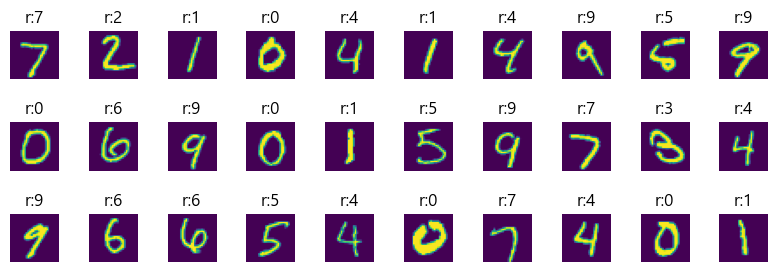

In [43]:
# 모델 학습 후 틀린 데이터 출력용(X_test, y_test)
plt_row = 3
plt_col = 10
# plt.figure(figsize = (plt_col, plt_row))
plt.rcParams['figure.figsize'] = (plt_col, plt_row)

plt.rc('font', family = 'Malgun Gothic') # 윈도우즈 os
# plt.rc('font', family = 'NanumBarunGothic') # 코랩 os

fig, axarr = plt.subplots(nrows = plt_row,
                          ncols = plt_col,)
plt.subplots_adjust(hspace = .9, 
                    wspace = .2)

# ch13_데이터시각화 2절 subplots() 참고
# 30번(3행x10열)
for i in range(plt_row * plt_col):
    """
    X_test[i]를 axarr[적절한 곳]에 출력(imshow)
    Y_test[i].argmax()의 실제값을 title에 출력
    """
    sub_plot = axarr[i//plt_col, i%plt_col]
    sub_plot.imshow(X_test[i].reshape(width, height)) # X_test[i]*255.0, imshow가 알아서 계산
#     sub_plot.set_title('r:' + str(y_test[i]))
    sub_plot.set_title('r:' + str(Y_test[i].argmax()))
    sub_plot.axis('off') # 축 제거

# 1. DNN

(50000, 784) (50000, 10) (10000, 784) (10000, 10) (10000, 784) (10000, 10)
Epoch 1/300
1000/1000 [==============================] - 8s 8ms/step - loss: 0.2346 - accuracy: 0.9308 - val_loss: 0.1204 - val_accuracy: 0.9664
Epoch 2/300
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0880 - accuracy: 0.9736 - val_loss: 0.0941 - val_accuracy: 0.9707
Epoch 3/300
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0604 - accuracy: 0.9812 - val_loss: 0.0808 - val_accuracy: 0.9768
Epoch 4/300
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0429 - accuracy: 0.9865 - val_loss: 0.0829 - val_accuracy: 0.9774
Epoch 5/300
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0324 - accuracy: 0.9893 - val_loss: 0.0908 - val_accuracy: 0.9758
Epoch 6/300
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0275 - accuracy: 0.9911 - val_loss: 0.0863 - val_accuracy: 0.9774
Epoch 7/300
1000/1000 [==============================] 

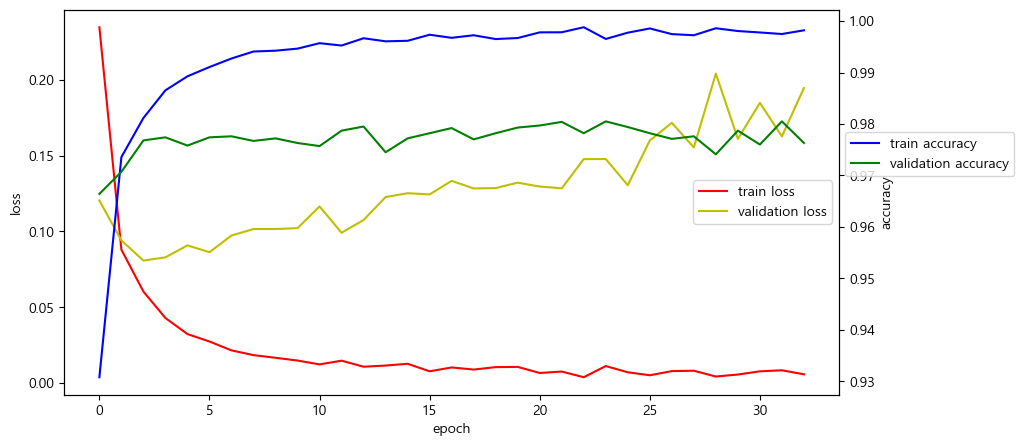

In [56]:
# 1. Dataset
width = 28; height = 28
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 독립변수: reshape(10000, 784) → float 형변환(mean같은 연산 정확도 up) → scale 조정(255.0으로 나누기, 0~1사이)
X_train = X_train.reshape(60000, width*height).astype('float32')/255.0
X_test  = X_test.reshape(10000, width*height).astype('float32')/255.0

# Dataset 분리
# train:validation:test = 50,000:10,000:10,000
X_val   = X_train[50000:]
y_val   = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

# 종속변수: One-Hot Encoding
Y_train = utils.to_categorical(y_train)
Y_val   = utils.to_categorical(y_val) 
Y_test  = utils.to_categorical(y_test) 
print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape)

# 2. Model 구성
model = Sequential()
model.add(Input(shape = (width * height, )))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

# 3. 학습과정 설정
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'nadam',
              metrics = ['accuracy'])
# 4. 학습시키기
early_stop = EarlyStopping(patience = 30)
hist = model.fit(X_train, Y_train, 
                 epochs = 300, 
                 batch_size = 50,
                 validation_data = [X_val, Y_val],
                 callbacks = [early_stop])
# 5. 학습과정 살펴보기
fig, loss_ax = plt.subplots(figsize = (10, 5))
loss_ax.plot(hist.history['loss'], 
             'r', 
             label = 'train loss')
loss_ax.plot(hist.history['val_loss'], 
             'y', 
             label = 'validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 
            'b', 
            label = 'train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 
            'g', 
            label = 'validation accuracy')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc = 'center right')
acc_ax.legend(bbox_to_anchor = (0.999, 0.7))
plt.show()

In [57]:
# 모델평가
loss, acc = model.evaluate(X_test, Y_test)
loss, acc

313/313 [==============================] - 1s 4ms/step - loss: 0.1800 - accuracy: 0.9739


(0.1799585372209549, 0.9739000201225281)

In [62]:
# 성능평가지표 = 교차표
yhat = model.predict(X_test).argmax(axis = 1) # 예측치
# print('예측치:', yhat)
# print('실제값:', np.argmax(Y_test, axis = 1))
print('실제값:', y_test)
pd.crosstab(y_test, yhat)

313/313 [==============================] - 1s 5ms/step
실제값: [7 2 1 ... 4 5 6]


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,974,1,0,1,1,0,2,0,1,0
1,3,1098,0,3,0,2,4,0,25,0
2,7,1,999,6,1,0,4,3,11,0
3,0,0,3,986,0,7,0,7,6,1
4,2,0,4,0,948,1,5,2,3,17
5,2,0,0,9,1,866,8,0,6,0
6,4,2,0,2,1,4,942,0,3,0
7,3,0,12,12,0,0,0,988,8,5
8,2,0,1,5,1,3,0,2,957,3


In [69]:
from sklearn.metrics import confusion_matrix
cmatrix= confusion_matrix(y_test, yhat)
cmatrix

(array([[ 974,    1,    0,    1,    1,    0,    2,    0,    1,    0],
        [   3, 1098,    0,    3,    0,    2,    4,    0,   25,    0],
        [   7,    1,  999,    6,    1,    0,    4,    3,   11,    0],
        [   0,    0,    3,  986,    0,    7,    0,    7,    6,    1],
        [   2,    0,    4,    0,  948,    1,    5,    2,    3,   17],
        [   2,    0,    0,    9,    1,  866,    8,    0,    6,    0],
        [   4,    2,    0,    2,    1,    4,  942,    0,    3,    0],
        [   3,    0,   12,   12,    0,    0,    0,  988,    8,    5],
        [   2,    0,    1,    5,    1,    3,    0,    2,  957,    3],
        [   2,    3,    0,    2,    8,    1,    0,    7,    5,  981]],
       dtype=int64),
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8),
 array([7, 2, 1, ..., 4, 5, 6], dtype=int64))

In [68]:
# 예측 실패 개수
# 실제값(y_test) ≠ 예측값(yhat)
# sol 1) enumerate 사용
cnt = 0
for i, row in enumerate(confusion_matrix(y_test, yhat)):
    for j, data in enumerate(row):
        if i != j:
            cnt += data
print('예측 실패 개수:', cnt)

예측 틀린 개수: 261


In [70]:
# so1 2) zip 사용
# 실제값(y_test), 예측값(yhat)둘 다 1차원
print(y_test, yhat)
cnt = 0
for y, h in zip(y_test, yhat):
    if y != h:
        cnt += 1
print('예측 틀린 개수:', cnt)

[7 2 1 ... 4 5 6] [7 2 1 ... 4 5 6]
예측 틀린 개수: 261


i = 10000
cnt = 70


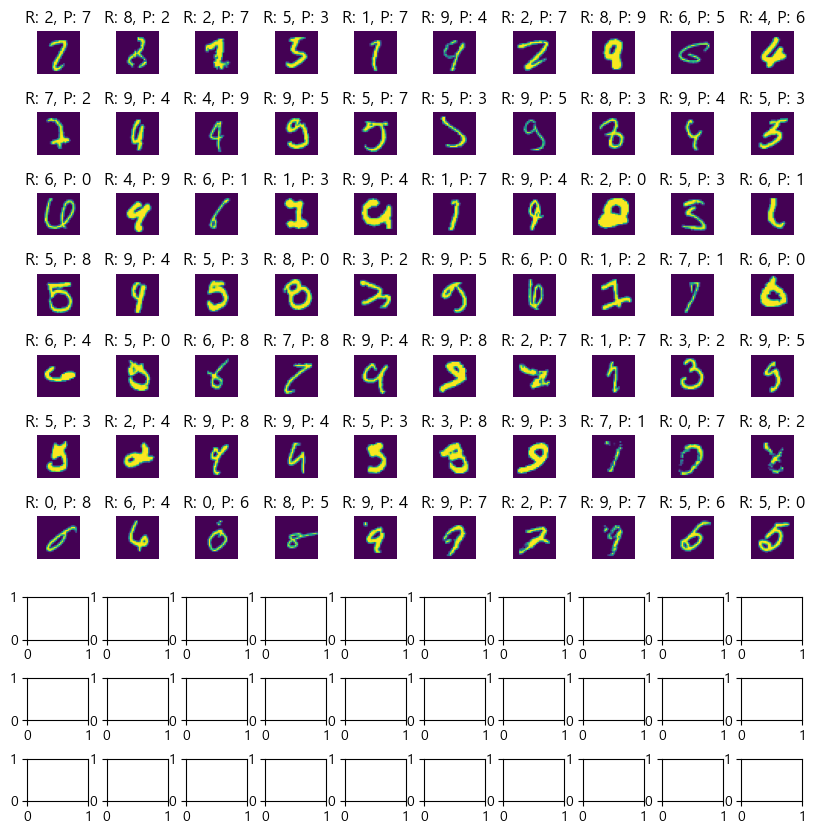

In [92]:
# 실제값(y_test) ≠ 예측값(yhat)
# sol 3
# 모델 학습 후 틀린 데이터 출력용(X_test, y_test)
plt_row = 10
plt_col = 10

plt.rcParams['figure.figsize'] = (plt_col, plt_row)
plt.rc('font', family = 'Malgun Gothic') # 윈도우즈 os

fig, axarr = plt.subplots(nrows = plt_row,
                          ncols = plt_col,)
# 세로/가로 간격(기본값 0, 커질수록 간격 넓어진다)
plt.subplots_adjust(hspace = .9, 
                    wspace = .3)

i = 0 # yhat과 y_test를 access할 index
cnt = 0 # 예측 실패 횟수
while(cnt < plt_row * plt_col) & (i < len(y_test)):
    # 예측 실패한 경우만 imshow(X_test[i]), 
    # 실제값(y_test)과 예측치(yhat)를 title에 출력
    if yhat[i] == y_test[i]:
        i += 1
        continue
    # 예측 실패한 경우
    sub_plot = axarr[cnt//plt_col, cnt%plt_col]
    sub_plot.imshow(X_test[i].reshape(width, height))
    title = 'R: {}, P: {}'.format(y_test[i], yhat[i])
    sub_plot.set_title(title)
    sub_plot.axis('off')
    i += 1
    cnt += 1
print('i =', i)
print('cnt =', cnt)

# 2. CNN(Convolution Neural Network)
- Convolution Layer → max pooling → DNN(교안 p35)
- 특정한 패턴의 특징(feature map)이 어디에서 나타나는가?

- 최초의 이미지 학습 알고리즘(LeNet)
![최초의 이미지 학습 알고리즘](https://i.ytimg.com/vi/58Uj79vo0d8/maxresdefault.jpg)

In [83]:
# 1. Dataset
width = 28; height = 28
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 독립변수: reshape(10000, 784) → float 형변환(mean같은 연산 정확도 up) → scale 조정(255.0으로 나누기, 0~1사이)
X_train = X_train.reshape(60000, width, height, 1).astype('float32')/255.0 # 28 x 28 x 1
X_test  = X_test.reshape(10000, width, height, 1).astype('float32')/255.0

# Dataset 분리
# train:validation:test = 50,000:10,000:10,000
X_val   = X_train[50000:]
y_val   = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

# 종속변수: One-Hot Encoding
Y_train = utils.to_categorical(y_train)
Y_val   = utils.to_categorical(y_val) 
Y_test  = utils.to_categorical(y_test) 
print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape)

# Model 생성
# 커널 대부분 홀수 (원데이터 - 커널size + 1)
# Conv(size 3 x 3인 커널 32개)     28 x 28 → 26 x 26 x 32
# MaxPooling (pooling size 2 x 2)           13 x 13 x 32
# Dropout
# Conv(size 3 x 3인 커널 64개)               11 x 11 x 32 x 64
# MaxPooling (pooling size 2 x 2)            6 x 6 x 32 x 64
# 1차원 데이터로 만들기
# DNN(hidden layer 128 units 한층-output layer)
model = Sequential()
model.add(Conv2D(32, # 커널 개수
                 3,  # 커널 사이즈
                 padding = 'same', # 입력층과 출력층의 개수를 일치시킴 (외곽에 의미 없는 값 삽입)
                 activation = 'relu',
                 input_shape = (width, height, 1), # 3차원 데이터
                ))
# MaxPooling은 parameter 필요X, 시간 적게 소요
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(64, 
                 3,dp
                 activation = 'relu',
                ))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
# Flatten() 어떤 차원이든 1차원으로 변환
model.add(Flatten()) # 2차원 → 1차원, DNN에 활용하기 위함

model.add(Dense(units = 128,
                activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 10, 
                activation = 'softmax'))
model.summary()

(50000, 28, 28, 1) (50000, 10) (10000, 28, 28, 1) (10000, 10) (10000, 28, 28, 1) (10000, 10)
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                           

In [84]:
# 3. 학습 설정
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])
# 4. 학습
earlystop = EarlyStopping(patience = 20)
hist = model.fit(X_train, Y_train,
                 epochs = 50,
                 batch_size = 32, 
                 validation_data = [X_val, Y_val],
                 callbacks = [earlystop]
                )

Epoch 1/50
1563/1563 [==============================] - 25s 11ms/step - loss: 0.2554 - accuracy: 0.9200 - val_loss: 0.0671 - val_accuracy: 0.9792
Epoch 2/50
1563/1563 [==============================] - 16s 10ms/step - loss: 0.1013 - accuracy: 0.9696 - val_loss: 0.0422 - val_accuracy: 0.9883
Epoch 3/50
1563/1563 [==============================] - 17s 11ms/step - loss: 0.0769 - accuracy: 0.9771 - val_loss: 0.0413 - val_accuracy: 0.9892
Epoch 4/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.0663 - accuracy: 0.9795 - val_loss: 0.0345 - val_accuracy: 0.9902
Epoch 5/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.0578 - accuracy: 0.9825 - val_loss: 0.0407 - val_accuracy: 0.9885
Epoch 6/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.0504 - accuracy: 0.9848 - val_loss: 0.0364 - val_accuracy: 0.9904
Epoch 7/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.0452 - accuracy: 0.9863 - val_loss: 0.0309 -

In [85]:
model.save('model/mnist_cnn.h5')

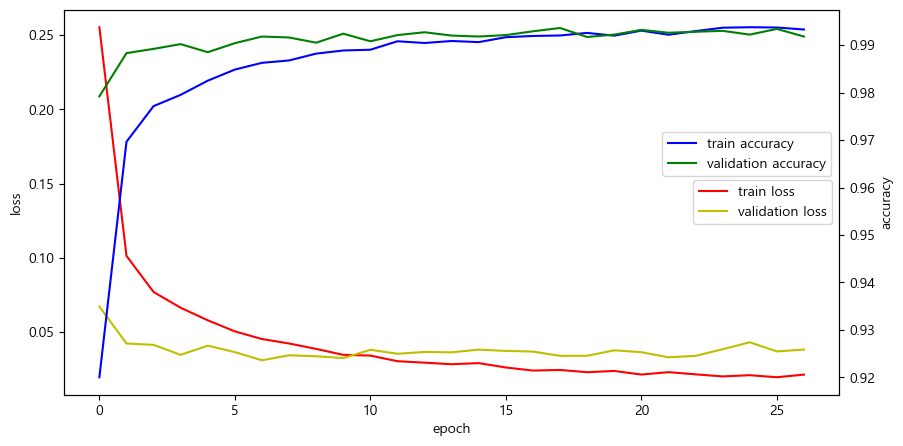

In [86]:
fig, loss_ax = plt.subplots(figsize = (10, 5))
loss_ax.plot(hist.history['loss'], 
             'r', 
             label = 'train loss')
loss_ax.plot(hist.history['val_loss'], 
             'y', 
             label = 'validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 
            'b', 
            label = 'train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 
            'g', 
            label = 'validation accuracy')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc = 'center right')
acc_ax.legend(bbox_to_anchor = (0.999, 0.7))
plt.show()

In [87]:
loss, accuracy = model.evaluate(X_val, Y_val)
loss, accuracy

313/313 [==============================] - 2s 5ms/step - loss: 0.0381 - accuracy: 0.9918


(0.038107480853796005, 0.9918000102043152)

In [89]:
# 예측치와 실제값을 이용해서 교차표
yhat = model.predict(X_test).argmax(axis = 1)
pd.crosstab(y_test, yhat)

313/313 [==============================] - 1s 3ms/step


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,977,0,0,0,0,0,1,1,1,0
1,0,1130,1,1,0,0,0,3,0,0
2,1,0,1025,0,1,0,0,5,0,0
3,0,0,2,1007,0,0,0,0,1,0
4,0,0,0,0,979,0,1,0,0,2
5,2,0,0,7,0,880,1,1,1,0
6,3,2,0,0,2,1,949,0,1,0
7,0,2,1,0,0,0,0,1024,1,0
8,1,0,2,1,0,1,0,0,968,1


In [91]:
cnt = 0
for y, h in zip(y_test, yhat):
    if y != h:
        cnt += 1
print('예측이 틀린 갯수:', cnt)

예측이 틀린 갯수: 70


i = 10000
cnt = 70


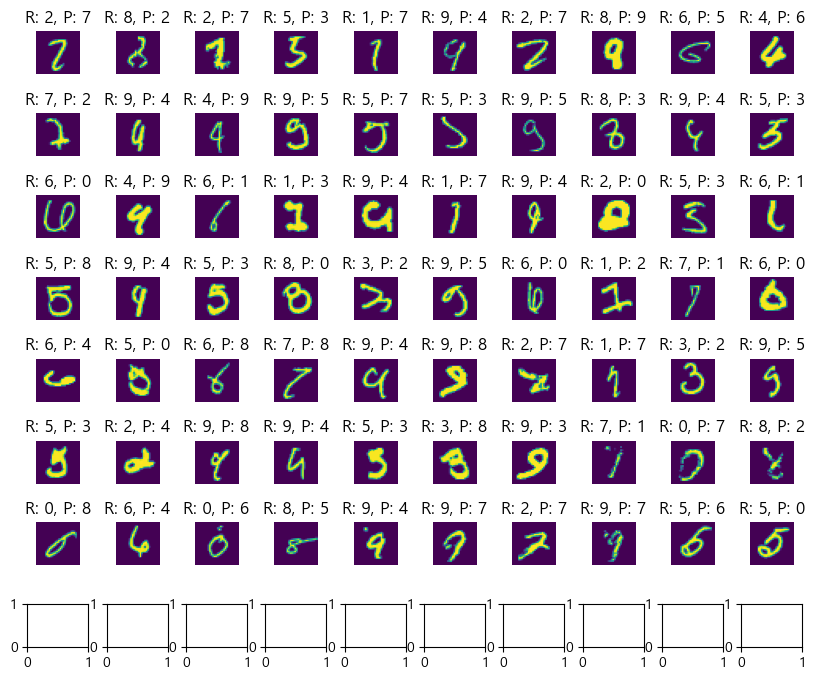

In [93]:
# 실제값(y_test) ≠ 예측값(yhat)
# 모델 학습 후 틀린 데이터 출력용(X_test, y_test)
plt_row = 8
plt_col = 10

plt.rcParams['figure.figsize'] = (plt_col, plt_row)
plt.rc('font', family = 'Malgun Gothic') # 윈도우즈 os

fig, axarr = plt.subplots(nrows = plt_row,
                          ncols = plt_col,)
# 세로/가로 간격(기본값 0, 커질수록 간격 넓어진다)
plt.subplots_adjust(hspace = .9, 
                    wspace = .3)

i = 0 # yhat과 y_test를 access할 index
cnt = 0 # 예측 실패 횟수
while(cnt < plt_row * plt_col) & (i < len(y_test)):
    # 예측 실패한 경우만 imshow(X_test[i]), 
    # 실제값(y_test)과 예측치(yhat)를 title에 출력
    if yhat[i] == y_test[i]:
        i += 1
        continue
    # 예측 실패한 경우
    sub_plot = axarr[cnt//plt_col, cnt%plt_col]
    sub_plot.imshow(X_test[i].reshape(width, height))
    title = 'R: {}, P: {}'.format(y_test[i], yhat[i])
    sub_plot.set_title(title)
    sub_plot.axis('off')
    i += 1
    cnt += 1
print('i =', i)
print('cnt =', cnt)